<h1>Assignment 5 - Object Counting On a Convey Belt - 180408H</h1>

<h2>1.0</h2>

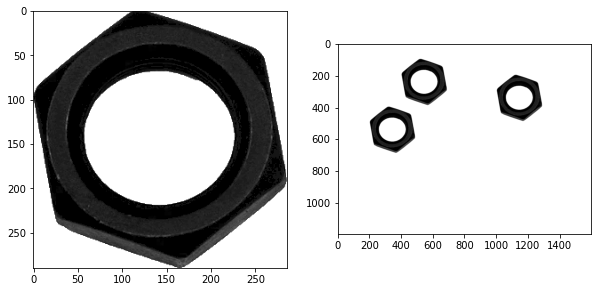

In [1]:
#importing required libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
%matplotlib inline

#Load and visualizing the template image and convey belt snapshot
template_im = cv.imread(r'template.png', cv.IMREAD_GRAYSCALE)
belt_im = cv.imread(r'belt.png', cv.IMREAD_GRAYSCALE)
fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(template_im, cmap='gray')
ax[1].imshow(belt_im, cmap='gray')
plt.show()

<h2>Part I</h2>

<h2>1.1.1 Otsu's Thresholding</h2>

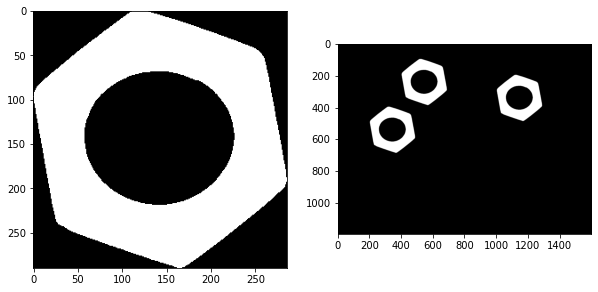

In [2]:
#Applying OTSU's thresholding to image and belt images
th_t, img_t = cv.threshold(template_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(img_t, cmap='gray')
ax[1].imshow(img_b, cmap='gray')
plt.show()

<h2>1.1.2 Morphological Closing</h2>

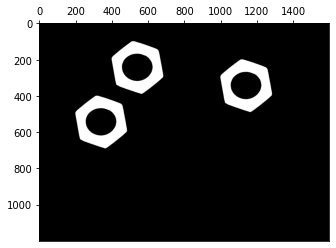

In [3]:
kernel = 	cv.getStructuringElement(cv.MORPH_RECT, (3,3)) #rectangular kernel, 3x3 matrix with all ones, with uint8 dtype>"
closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)
fig, ax = plt.subplots()
ax.imshow(closing_b, cmap = 'gray')
ax.xaxis.tick_top()
plt.show()

<h2>1.1.3 Connected Component Analysis</h2>

Template
A. Number of Labels including background= 2


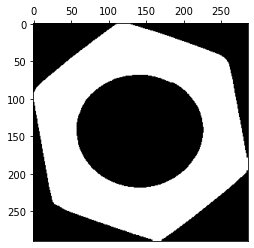

B. Statistics Output for each label including background= 
 [[    0     0   286   290 42290]
 [    0     0   286   290 40650]] 

C. Centroid output for each label including background=
 [[142.18770395 145.19172381]
 [142.82489545 143.780369  ]] 

Belt
A. Number of Labels including background= 4


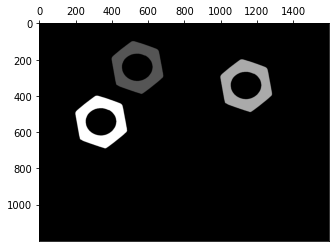

B. Statistics Output for each label including background= 
 [[      0       0    1600    1200 1798161]
 [    400     100     286     290   40613]
 [   1000     200     286     290   40613]
 [    200     400     286     290   40613]] 

C. Centroid output for each label including background=
 [[ 807.85728475  614.56805258]
 [ 542.82567158  243.78479797]
 [1142.82567158  343.78479797]
 [ 342.82567158  543.78479797]] 



In [4]:
retval_t, labels_t, stats_t, centroids_t = cv.connectedComponentsWithStats(closing_t)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b) #"< Your code to perform connected component analysis for closing_b>"

#Function to display stats
def ConnectedComponentAnalysis(img,retval,label,stats,centroids):
    print(img)
    print("A. Number of Labels including background=",retval)
    fig, ax = plt.subplots()
    ax.imshow(label, cmap = 'gray')
    ax.xaxis.tick_top()
    plt.show()
    print("B. Statistics Output for each label including background=","\n",stats,"\n")
    print("C. Centroid output for each label including background=\n",centroids,"\n")

CCA_t=ConnectedComponentAnalysis("Template",retval_t,labels_t,stats_t,centroids_t)
CCA_b=ConnectedComponentAnalysis("Belt",retval_b,labels_b,stats_b,centroids_b)

<h2>1.1.4 Contour Analysis</h2>

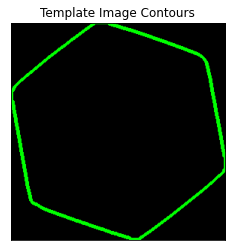

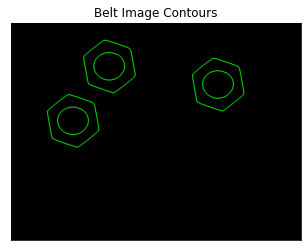

In [9]:
#Find Contours in an image
contours_t, hierarchy_t = cv.findContours(closing_t, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_b, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)#"< Your code to perform counter analysis for closing_b>"

im_contours_temp = np.zeros((template_im.shape[0],template_im.shape[1],3), np.uint8)
im_contours_belt = np.zeros((belt_im.shape[0],belt_im.shape[1],3), np.uint8)

#Drawing contours in a image
conts_t = cv.drawContours(im_contours_temp, contours_t, -1, (0,255,0), 3).astype('uint8')
conts_b = cv.drawContours(im_contours_belt, contours_b, -1, (0,255,0), 3).astype('uint8')
#plt.imshow(conts)

plt.imshow(conts_t)
plt.title('Template Image Contours')
plt.xticks([]), plt.yticks([])
plt.gcf().set_facecolor("white")
plt.show()

plt.imshow(conts_b)
plt.title('Belt Image Contours')
plt.xticks([]), plt.yticks([])
plt.gcf().set_facecolor("white")
plt.show()


<h2>1.1.5 Count the number of matching hexagonal nuts in belt.png</h2>

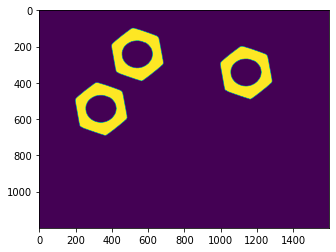

Matching of Contour 1 = 0.00010071698397173812
Matching of Contour 2 = 0.00010071698397950968
Matching of Contour 3 = 0.00010071698397506879
Number of Contours = 3


In [30]:
label = 1 # remember that the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8') #comparing component analysed image with 1 to get a binary image
plt.imshow(belt)
plt.show()

belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
ContNum=0

#Match the contour in template and the found contours in belt image
for j,c in enumerate(belt_cont):
    match=cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)
    
    if match<=0.00015:
        print("Matching of Contour",j+1,"=",match)
        ContNum+=1

print("Number of Contours =",ContNum)   

<h2>1.2 Part II</h2>

<h2>1.2.1 Frame Tracking Through Image Moments</h2>

In [11]:
#Accessing contour area
ca = cv.contourArea(contours_b[1])
print(ca)

#Accessing other parameters of a contour
M = cv.moments(contours_b[1])
print(M['m00'])

#Calculating the centroid of a contour
cx, cy = (int(M['m10']/M['m00']),int(M['m01']/M['m00']))
print("Centroid(x,y) = ",cx,cy)

20080.0
20080.0
Centroid(x,y) =  341 542


In [12]:
count =1
object_prev_frame = np.array([cx, cy, ca, count])

delta_x=15
object_curr_frame=np.array([cx, cy, ca, count])
print(object_curr_frame[0])

if object_curr_frame[0]<delta_x and object_prev_frame[0]<delta_x:
    print("True")
else:
    print("False")

341.0
False


<h2>1.3 Part III</h2>

<h2>1.3.1 Tmplement the function get_indexed_image, which takes an image as the
input, performs thresholding, closing, and connected component analysis and
return retval, labels, stats, centroids</h2>

In [13]:
#Function to perform thresholding, closing and connected component analysis when an image is given
def get_indexed_image(im):
    """ Thresholding, closing, and connected component analysis lumped"""

    th, img = cv.threshold(im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    kernel = 	cv.getStructuringElement(cv.MORPH_RECT, (3,3))
    closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
    retval, labels, stats, centroids = cv.connectedComponentsWithStats(closing)
    return retval, labels, stats, centroids

<h2>1.3.2 Implement the function is_new, which checks the dissimilarity between 2
vectors</h2>

In [73]:
#Check whether the absolute different between all the elements of ith column of each array is greater than the ith delta value (See thee example in the next cell)
def is_new(a,b,delta,i):
    abs_diff=np.abs(a-b)
    dissimilarity=[]
    for val in range(len(i)):
        for row in range(len(a)):
            if abs_diff[row,val]>delta[val]:
                dissimilarity.append(1)
            else:
                dissimilarity.append(0)    
    dissim=np.array(dissimilarity).all()
    return dissim


In [19]:
# check is_new expected answer False
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])
assert is_new(a, b, delta, i) == False, " Check the function "

False


<h2>1.3.3 If the array a is in the shape of (number of nuts , len(object_prev_frame))( i.e. array a is made by stacking all the object_prev_frame for each frame. If
b is in the form of [cx, cy, ca, count], write the function prev_index to find the
index of a particular nut in the previous frame.</h2>

In [119]:
def prev_index(a, b, delta, i):
    """ Returns Previous Index
    Returns the index of the apppearance of the object in the previous frame.
    (See thee example in the next cell)
    """
    index = -1
    abs_diff=np.abs(a-b)
    dissimilarity=[]
    for val in range(len(i)):
        for row in range(len(a)):
            if abs_diff[row,val]<=delta[val]:
                index=a[row][-1]
    return index

In [120]:
# check prev_index expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])
assert prev_index(a,b,delta,i) == 1, " Check the function "

In [121]:
#Accessing and storing each frame of videp
frames=[]
color_frames=[]
cap = cv.VideoCapture('conveyor_with_rotation.mp4') # give the correct path here
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #cv.imshow("Img",frame)
    color_frames.append(frame)
    grey=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    frames.append(grey)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

#for i in range(5):
#    plt.imshow(frames[10*i+100])
 #   plt.title('Belt Image Contours')
  #  plt.xticks([]), plt.yticks([])
   # plt.gcf().set_facecolor("white")
    #plt.show()

Can't receive frame (stream end?). Exiting ...


<h2>1.3.4 Implement a code to detect hexagonal nuts in a moving convey belt</h2>

<h2>1.4 Steps</h2>

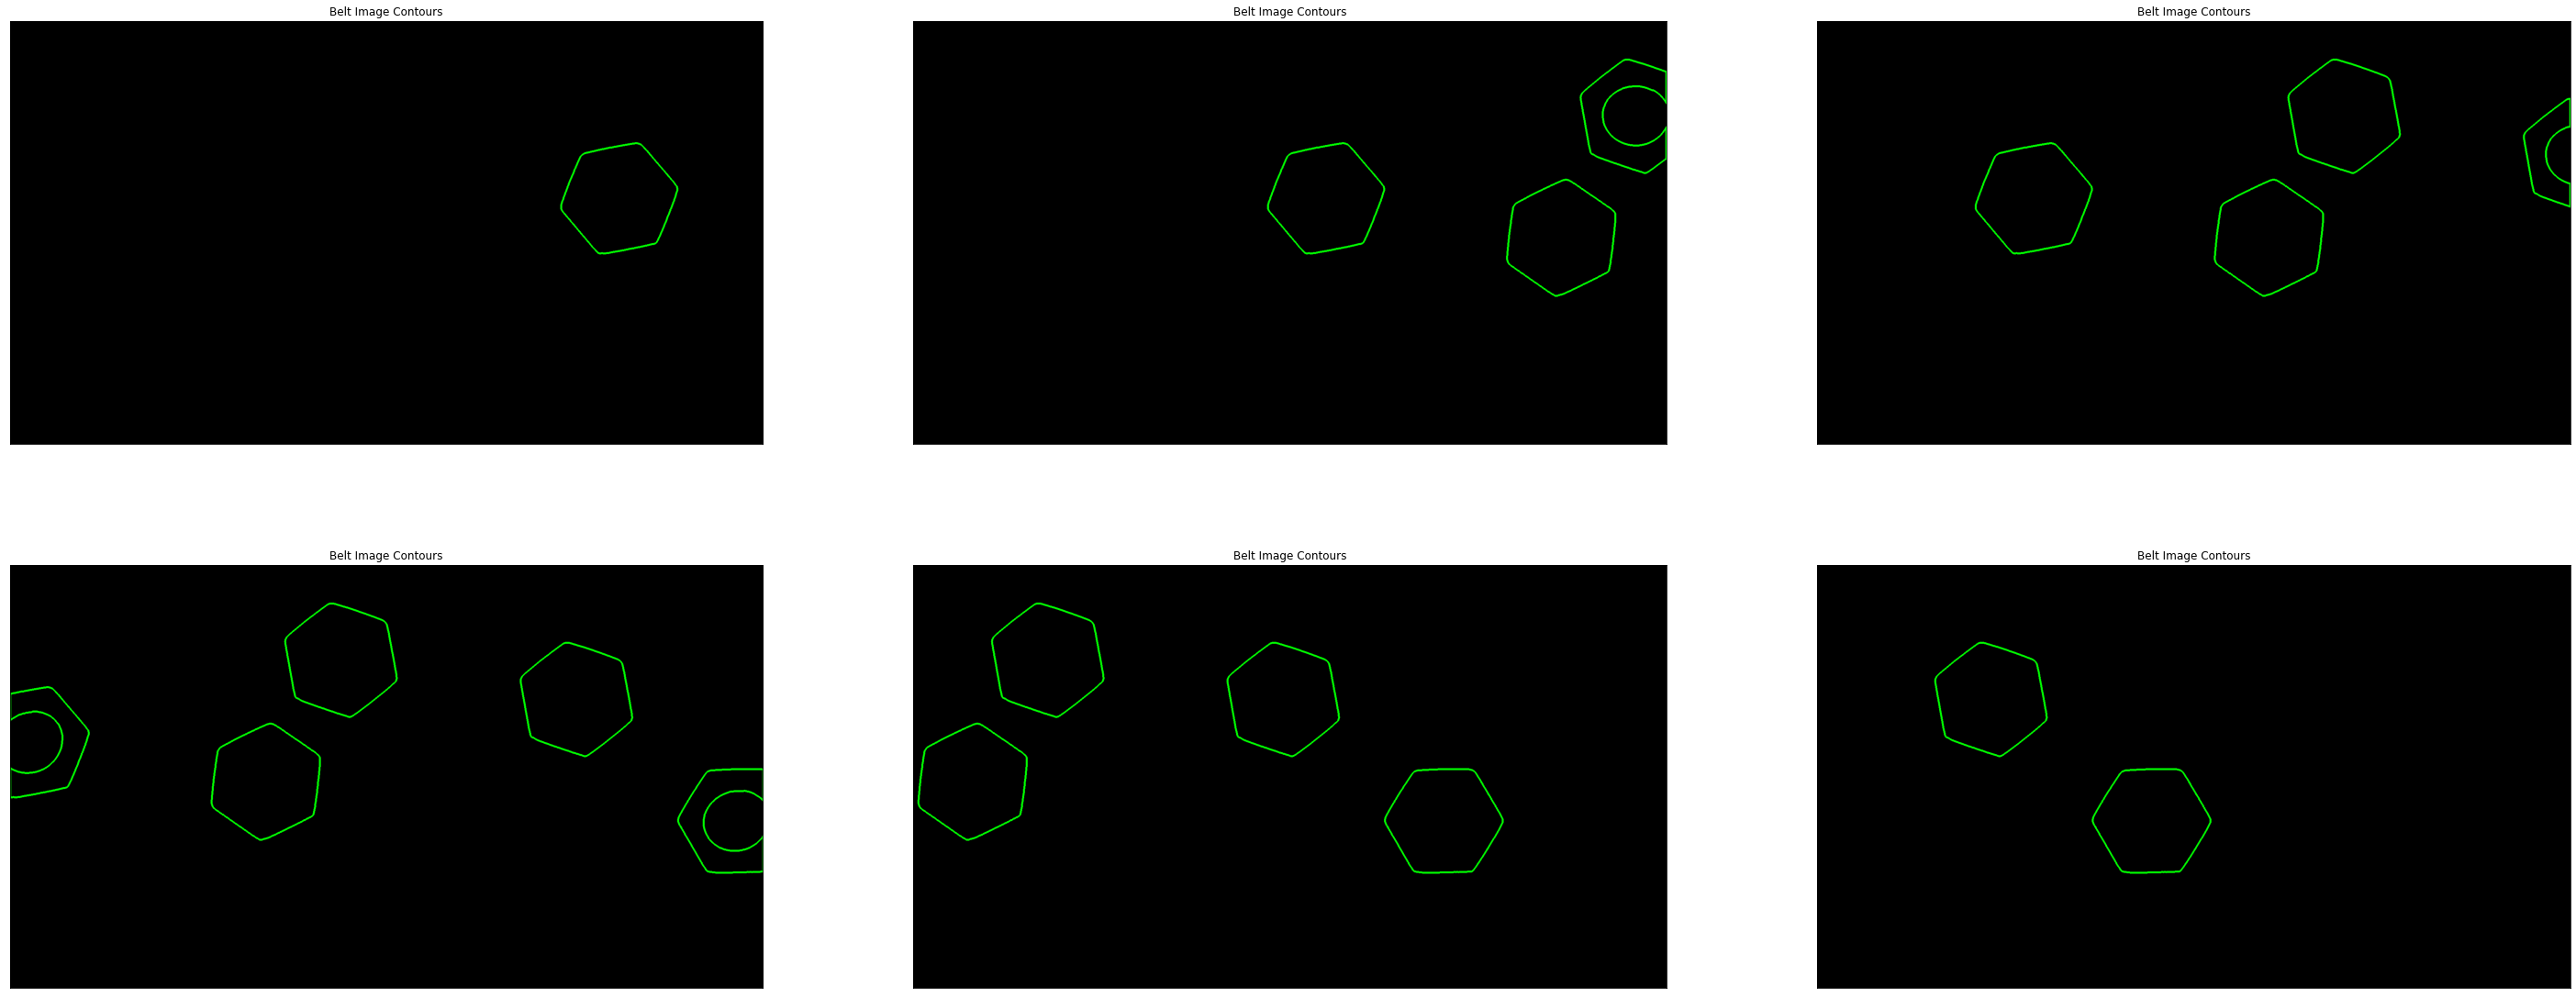

In [122]:
AllConts=[]
for grey in frames:
    retval, labels, stats, centroids=get_indexed_image(grey)
    
    label = 1 # remember that the label of the background is 0
    belt = ((labels >= label)*255).astype('uint8') #comparing component analysed image with 1 to get a binary image
    contours, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    im_contours_belt = np.zeros((belt.shape[0],belt.shape[1],3), np.uint8)
    conts = cv.drawContours(im_contours_belt, contours, -1, (0,255,0), 3).astype('uint8')
    AllConts.append(conts)
    
plt.figure(figsize=(50,20))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(AllConts[50*i])
    plt.title('Belt Image Contours')
    plt.xticks([]), plt.yticks([])
    plt.gcf().set_facecolor("white")
plt.show()


<h2>1.5 Object Detection and Tracking</h2>

In [148]:
AllFrames=[]
count=0
contoursF=[]
delta = np.array([15])
i = np.array([0])
for grey in frames:
    screen=[]
    retval, labels, stats, centroids=get_indexed_image(grey)

    label = 1 # remember that the label of the background is 0
    belt = ((labels >= label)*255).astype('uint8') #comparing component analysed image with 1 to get a binary image
    contours, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    contoursF.append(contours)
    
    for j,c in enumerate(contours):
        match=cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)
        
        if match<=0.05:
            count+=1
            ca = cv.contourArea(c)
            M = cv.moments(c)
            cx, cy = (int(M['m10']/M['m00']),int(M['m01']/M['m00']))
            nut=np.array([cx,cy,ca,count])
            screen.append(nut)
    AllFrames.append(screen)
previous_frame=AllFrames[0]

nut_count=AllFrames[0][-1][-1]
#print(nut_count)
nut_index=nut_count
for pic in range(1,len(AllFrames)):
    for nut in AllFrames[pic]:
        if is_new(previous_frame,nut,delta,i):
            nut_count+=1
            nut[-1]=nut_count
        else:
            nut_index=prev_index(previous_frame,nut, delta, i)
            nut[-1]=nut_index
        #print(nut_count,nut[-1])
    previous_frame=AllFrames[pic]
    #print(nut_count,nut[-1])
print(nut_count)


5.0


In [149]:
#Annotating the images
Frame =[]

for i in range(len(color_frames)):
    annotated_img = cv.putText(color_frames[i], 'Frame:'+str(i), (100, 760), cv.FONT_HERSHEY_SIMPLEX, 2,(255,0,0),4) #Displaying frame number
    annotated_img= cv.putText(annotated_img,'180408H',(100,150), cv.FONT_HERSHEY_SIMPLEX, 2,(255,0,0),5) # Displaying my index number
    annotated_img = cv.drawContours(annotated_img, contoursF[i], -1, (255,0,0), 4).astype('uint8') # drawing contours
    a = 0
    for j in AllFrames[i]:
        a+=1
        cv.putText(annotated_img, str(int(j[-1])), (int(j[0]),int(j[1])), cv.FONT_HERSHEY_SIMPLEX, 2,(255,0,0),4) # placing contour numbers
        annotated_img = cv.putText(annotated_img, "Object "+str(int(j[-1]))+": "+str(int(j[0]))+"  "+str(int(j[1]))+"  "+str(int(j[2])),(100,760 +70*a), cv.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 4) # contour details 

    Frame.append(annotated_img)

In [151]:
#writing to video
fourcc = cv.VideoWriter_fourcc(*'MP4V') 
fps = int(len(Frame)/9) #Video duration is 9 seconds 
height, width = Frame[0].shape[0], Frame[0].shape[1]
out = cv.VideoWriter('180408H_en2550_a05.mp4' , fourcc, fps ,(width, height), True)
for frame in Frame:
    out.write(frame)
out.release()